### Basic Steps to solve Machine Learning Problems:
ML Basic Steps:

Data Pre-processing/Data Engineering:
1. Read Data
2. Identify the info
3. Describe the data
4. Handling missing/null values
5. Checking categorical values and check the need of one-hot-encoding
6. Visualise data with histogram/scatter plot etc. to see any relation or pattern
7. Identify the positive/negative co-relation with the Target/Label values
8. Heat-map to show the co-relation between the columns

Feature Engineering and Model Evaluation:
1. Standard scaler can be used to scale the data if required
2. Splitting training data with train_test_split/Cross_val_score
3. basic check on different models with default hyper parameters.
4. Using GridSearchCV/RandamizedSearchCV to identify the model selection and its best parameter

Machine Learning Model Prediction:
1. Once the model and best parameter is decided, accuracy is being checked
2. For classification problems, Confusion Metrics is also generated to find the TN, TP, FN and FP
3. Depending on the scenario, further tuning can be done
4. Predict the values.

Notes: train-test-split can be used before using cross_val_score, as it gives one set of testing data to final check on our model prediction before using unknown data for prediction.

### Tabular Playground series Jan2021 is a regression problem as the target/label value is contineous

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [5]:
df_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [6]:
X = df_train.drop("target", axis = 1)
y = df_train["target"]

In [7]:
X.shape, y.shape

((300000, 15), (300000,))

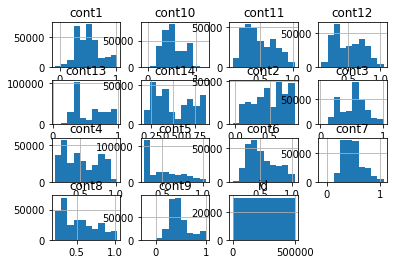

In [8]:
X.hist();

### Checking Correlation of the data with Target value

In [9]:
df_train.corr()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,1.000000,-0.001454,0.000574,0.001609,0.002131,0.001959,-0.001971,-0.000155,0.002112,0.000030,-0.001652,-0.000484,-0.002075,-0.000577,0.001940,0.001347
cont1,-0.001454,1.000000,-0.080170,-0.419712,0.273705,-0.059012,0.698556,0.341478,0.373340,0.794003,0.725040,0.565717,0.600041,0.570382,0.067294,-0.032994
cont2,0.000574,-0.080170,1.000000,0.334487,-0.005533,0.150737,0.023692,0.116222,0.081049,-0.046769,0.035101,0.126024,0.092642,0.017383,0.023972,0.067102
cont3,0.001609,-0.419712,0.334487,1.000000,-0.329131,0.060931,-0.300509,0.106904,-0.309783,-0.406743,-0.289756,-0.075415,-0.103735,-0.386521,-0.065457,0.058936
cont4,0.002131,0.273705,-0.005533,-0.329131,1.000000,0.123526,0.152752,-0.077045,0.324784,0.261927,0.204139,0.063961,0.073291,0.155226,0.054703,0.005522
cont5,0.001959,-0.059012,0.150737,0.060931,0.123526,1.000000,-0.179084,-0.241272,0.010438,-0.071764,-0.102531,-0.222244,-0.192571,-0.140272,0.040552,-0.005358
cont6,-0.001971,0.698556,0.023692,-0.300509,0.152752,-0.179084,1.000000,0.541975,0.415008,0.716613,0.770628,0.737495,0.757105,0.783604,0.067007,0.027955
cont7,-0.000155,0.341478,0.116222,0.106904,-0.077045,-0.241272,0.541975,1.000000,0.150403,0.341759,0.465418,0.672188,0.657310,0.322415,-0.037135,0.067234
cont8,0.002112,0.373340,0.081049,-0.309783,0.324784,0.010438,0.415008,0.150403,1.000000,0.429986,0.362336,0.296598,0.323042,0.475072,0.100645,0.014698
cont9,0.000030,0.794003,-0.046769,-0.406743,0.261927,-0.071764,0.716613,0.341759,0.429986,1.000000,0.725053,0.575095,0.605091,0.628391,0.081992,-0.013029


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [11]:
linreg = LinearRegression()
score = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_root_mean_squared_error')
print(score)

[-0.72959621 -0.72894278 -0.72910198 -0.72513415 -0.72370333 -0.7291652
 -0.72179315 -0.72650685 -0.72281336 -0.72559663]


In [12]:
print(score.mean())

-0.7262353643501045


In [13]:
#knn = KNeighborsRegressor(n_neighbors = 25)
#score = cross_val_score(knn, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean()
#print(score)

# This takes high computation time

In [14]:
tree = DecisionTreeRegressor()
score = cross_val_score(tree, X, y, cv = 10, scoring = 'neg_root_mean_squared_error').mean()
print(score)

-1.0129901779065436


### Identify/search for best parameter and score with GridSearchCV/RandomizedSearchCV

In [15]:
d_range = [1,2,3,4,5,6,7,8,9,10,11]
tree_param = dict(max_depth = d_range)

In [16]:
print(tree_param)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}


In [17]:
grid_tree = GridSearchCV(tree, param_grid = tree_param, cv = 5, n_jobs = -1 , verbose = True, scoring = 'neg_root_mean_squared_error')

In [18]:
grid_tree.fit(X,y)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  2.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [19]:
grid_tree.best_score_

-0.7193569724869378

In [20]:
grid_tree.best_params_

{'max_depth': 8}

In [21]:
grid_tree.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
# Next Step to search for other hyperparameter for Decision Tree and then also check the RandomizedSearcgCV for random
# selection of parameter.

In [13]:
forest_tree = RandomForestRegressor()
#forest_score = cross_val_score(forest_tree, X, y, cv = 5, scoring = 'neg_root_mean_squared_error').mean()
#print(forest_score)

In [29]:
forest_params = {'n_estimators' : range(1,4) , 'max_depth' : range(1,10), 'criterion' : ['mae']}
#, 'criterion' : ['mse','mae']

In [30]:
forest_grid =  GridSearchCV(forest_tree, forest_params, cv = 5, n_jobs = -1 , verbose = True, scoring = 'neg_root_mean_squared_error')

In [ ]:
forest_grid.fit(X,y)

In [ ]:
forest_grid.best_score_

In [21]:
forest_grid.best_params_

{'max_depth': 9, 'n_estimators': 3}

In [22]:
forest_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
svr = SVR()

# class sklearn.svm.SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, 
#shrinking=True, cache_size=200, verbose=False, max_iter=- 1)[source]
#{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

In [58]:
svr_params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] }
svr_grid =  GridSearchCV(svr, svr_params, cv = 5, n_jobs = -1 , verbose = True, scoring = 'neg_root_mean_squared_error')

In [59]:
svr_grid.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
svr_grid.best_score_

In [ ]:
svr_grid.best_params_

In [ ]:
svr_grid.best_estimator_

In [ ]:
# Below Steps for submission to kaggel competition

In [23]:
test = pd.read_csv("test.csv")

In [24]:
test.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [25]:
predictions = forest_grid.predict(test)

In [26]:
submission = pd.DataFrame({'id':test['id'],'target':predictions})

In [27]:
submission.head()

,id,target
0,0,8.202545
1,2,7.803140
2,6,7.818658
3,7,8.004810
4,10,8.130524


In [28]:
submission.to_csv("sample_submission.csv", index=False)

In [ ]:
#Public Board Kaggle: 0.71639, 0.71639